These are moleculeNet benchmarks meant to sanity check our approaches

In [1]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pathlib import Path
import pandas as pd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15, titlesize=20)
plt.rc('figure', titlesize=20)
# plt.rc('axes', titlesize=SMALL_SIZE)


data_p = Path("/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/")


green_color_pal = sns.color_palette("Greens", 10)
blue_color_pal = sns.color_palette("Blues", 10)
rocket_color_pal = sns.color_palette("rocket", 10)

In [2]:
green_color_pal

[(0.9176931949250289, 0.9684275278738947, 0.901361014994233),
 (0.8459054209919262, 0.9399307958477509, 0.8228219915417148),
 (0.7558477508650518, 0.9033910034602076, 0.7290426758938869),
 (0.6436447520184544, 0.8561476355247981, 0.6197923875432525),
 (0.5185697808535179, 0.7983391003460207, 0.5150941945405614),
 (0.3827450980392157, 0.7332564398308343, 0.42737408688965783),
 (0.2452133794694348, 0.6602537485582468, 0.35695501730103807),
 (0.1566320645905421, 0.5657670126874279, 0.28608996539792386),
 (0.06082276047673972, 0.47958477508650516, 0.21599384851980008),
 (0.0, 0.38268358323721646, 0.15398692810457515)]

In [3]:
blue_color_pal

[(0.8978854286812764, 0.939038831218762, 0.977362552864283),
 (0.828881199538639, 0.8937639369473279, 0.954725105728566),
 (0.7506343713956171, 0.8478431372549019, 0.9282122260668974),
 (0.6325259515570935, 0.7976470588235294, 0.8868742791234141),
 (0.491764705882353, 0.7219684736639754, 0.8547789311803152),
 (0.36159938485198, 0.6427374086889658, 0.8165782391387928),
 (0.24816608996539793, 0.5618915801614763, 0.7709803921568628),
 (0.15072664359861593, 0.4644521337946943, 0.7207843137254902),
 (0.07481737793156479, 0.3732564398308343, 0.6552095347943099),
 (0.03137254901960784, 0.28161476355247983, 0.5582622068435218)]

In [4]:
rocket_color_pal

[(0.13501631, 0.07585609, 0.19044109),
 (0.26930915, 0.1091727, 0.2772502),
 (0.41282936, 0.12164769, 0.33467689),
 (0.57077365, 0.11135597, 0.35827146),
 (0.72398193, 0.08688725, 0.33943958),
 (0.85281737, 0.15657772, 0.27909826),
 (0.93078135, 0.31373977, 0.24468803),
 (0.95626788, 0.49187351, 0.33985601),
 (0.96388426, 0.64484214, 0.4861196),
 (0.96810471, 0.78634563, 0.66773889)]

In [5]:


color_dict = {
    "smiles-pe.atomwise.0": rocket_color_pal[3],
    "smiles-pe.bpe.0": rocket_color_pal[3],   
#     "smiles-pe.ngram.1": color_pal[0],
#     "smiles-pe.ngram.2": "steelblue",
#     "smiles-pe.ngram.3": "steelblue",
#     "selfies.None": "purple",
#     "selfies.selfies-charwise": "purple",
"selfies.None": green_color_pal[4],
#     "selfies.selfies-charwise": color_pal[2],
    "ecfp": green_color_pal[6],
    "rp": green_color_pal[8],
    "rf": blue_color_pal[4],
#     "openhd": "green",
    "mlp": blue_color_pal[4],
#     "Vina": color_pal[2]
}

marker_dict = {
#     "smiles-pe": "+",
    "smiles-pe.atomwise.0": "+",
    "smiles-pe.bpe.0": "+",   
#     "smiles-pe.ngram.1": "+",
#     "smiles-pe.ngram.2": "+",
#     "smiles-pe.ngram.3": "+",
    "selfies.None": "*",
#     "selfies.selfies-charwise": "*",
    "ecfp": "+",
    "rp": "+",
    "rf": "^",
#     "openhd": "*",
    "mlp": "+",
#     "Vina": "+"
}


model_order_list = [
    ("smiles-pe.atomwise.0", "MoleHD-Atomw."),
    ("smiles-pe.bpe.0", "MoleHD-BPE"),
#     ("smiles-pe.ngram.1", "SMILES uni-gram"),
    ("selfies.None", "HDBind-SELFIES"),
#     ("selfies.selfies-charwise", "SELFIES uni-gram"),
    ("ecfp", "HDBind-ECFP"),
    ("rp", "HDBind-ECFP+RP"),
    ("rf", "RF"),
    ("mlp", "MLP"),
    ("Vina", "Vina")
]


model_name_dict = {
    "smiles-pe.atomwise.0": "MoleHD-Atomw.", 
    "smiles-pe.bpe.0": "MoleHD-BPE",
#     "smiles-pe.ngram.1": "SMILES uni-gram",
    "selfies.None": "HDBind-SELFIES",
#     "selfies.selfies-charwise": "SELFIES uni-gram",
    "ecfp": "HDBind-ECFP",
    "rp": "HDBind-ECFP-RP",
    "rf": "RF",
    "mlp": "MLP",
    "Vina": "Vina"
}


linestyle_dict = {
    "smiles-pe.atomwise.0": "-", 
    "smiles-pe.bpe.0": ":",
    "selfies.None": "-",
    "ecfp": ":",
    "rp": "-.",
    "rf": "-",
    "mlp": ":",
    "Vina": "-"
}







def plot_confusion_matrix(y_pred, y_true, ax):

    cm = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=[0,1], normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
    disp.plot(cmap="Purples", ax=ax)
    
    
    
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

    
def plot_dist_plot(y_score, y_true, ax):
    
    neg_dist = y_score[y_true == 0]
    pos_dist = y_score[y_true == 1]
    
    
    sns.distplot(neg_dist, color="blue", ax=ax)
    sns.distplot(pos_dist, color="red", ax=ax)
    

In [6]:
import os

print(os.system("hostname"))

pascal83
0


sh: _spack_shell_wrapper: line 1: syntax error: unexpected end of file
sh: error importing function definition for `_spack_shell_wrapper'
sh: spack: line 1: syntax error: unexpected end of file
sh: error importing function definition for `spack'


In [42]:
def bbbp_main(split_type):
    

    
    roc_f, roc_ax = plt.subplots(1,2, figsize=(16,8), sharex=True, sharey=True)


#     data_path_list = list(data_p.glob(f"bbbp.{split_type}*.pkl"))        

#     for path in data_path_list:



    for split_type, ax in [("random", roc_ax[0]), ("scaffold", roc_ax[1])]:
        for model, color in color_dict.items():


            print(model, color)

    #         import pdb 
    #         pdb.set_trace()


    #         /g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/bbbp.random.ecfp.atomwise.0.pkl

            data_path_list = list(data_p.glob(f"bbbp.{split_type}.{model}*pkl"))

        
            ax.set_title(split_type.capitalize())
        
            print(len(data_path_list))

            # in the case of bbbp we only have one path
            path = data_path_list[0]

            with open(path, "rb") as handle:
                data = pickle.load(handle)

                print(path)

                y_pred = data[0]['y_pred']
                y_true = data[0]['y_true']
                y_score = data[0]['eta']

                score = None

                if y_score.squeeze().ndim < 2:
                    score = y_score
                else:
                    score = y_score[:, 1]

    #             plot_roc_curve(y_score=score, y_true=y_true, ax=roc_ax, name=model)

                fpr, tpr, thresholds = roc_curve(y_score=score, y_true=y_true)
                roc_auc = auc(fpr, tpr)


                ax.plot(fpr, tpr, color=color, label=model_name_dict[model], linestyle=linestyle_dict[model],
                       linewidth="3")

                ax.plot([0, 1], [0, 1], 'k--')  # random predictions curve

                    
                
    #             disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    #             disp.plot(ax=roc_ax, name=name)


    for ax in roc_ax:
        ax.legend()

    roc_ax[0].set_title("Random", fontdict={"fontsize": 20})
    roc_ax[1].set_title("Scaffold", fontdict={"fontsize": 20})

#         roc_ax.set_xlabel("FPR")
#         roc_ax.set_ylabel("TPR")
    #     roc_f.suptitle("Blood-Brain-Barrier Permeability Reciever Operating Curve")
    plt.tight_layout()
    plt.savefig(f"bbbp_roc.png", dpi=600, bbox_inches="tight")
#         '''

smiles-pe.atomwise.0 (0.57077365, 0.11135597, 0.35827146)
1
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/bbbp.random.smiles-pe.atomwise.0.pkl
smiles-pe.bpe.0 (0.57077365, 0.11135597, 0.35827146)
1
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/bbbp.random.smiles-pe.bpe.0.pkl
selfies.None (0.5185697808535179, 0.7983391003460207, 0.5150941945405614)
1
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/bbbp.random.selfies.None.0.pkl
ecfp (0.2452133794694348, 0.6602537485582468, 0.35695501730103807)
1
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/bbbp.random.ecfp.atomwise.0.pkl
rp (0.06082276047673972, 0.47958477508650516, 0.21599384851980008)
1
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/bbbp.random.rp.atomwise.0.pkl
rf (0.491764705882353, 0.7219684736639754, 0.8547789311803152)
1
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/bbbp.random.rf.atomwise.0.pkl
mlp (0.491764705882353, 0.7219684736639754, 0.85477893118031

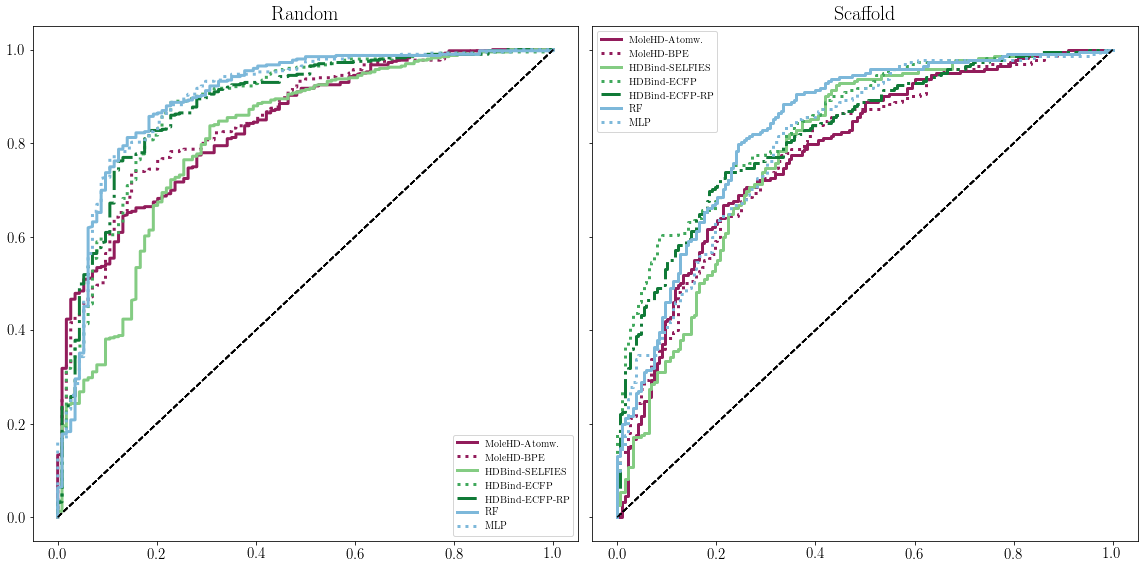

In [43]:
bbbp_main(split_type="random")

In [40]:
def sider_main():
    
    sider_f, sider_ax = plt.subplots(1,2, figsize=(16,8), sharex=True, sharey=True)
    sider_ax = sider_ax.flatten()
    
    
    model_dict = {"model": [], "task": [], "roc-auc": []}

    for split_type, ax in [("random", sider_ax[0]), ("scaffold", sider_ax[1])]:
        for model, color in color_dict.items():
        
        
#             if "selfies" in model.lower():
        
#                 continue
            
            ax.set_title(split_type.capitalize())

            
            data_path_list = list(data_p.glob(f"sider.*.{split_type}.{model}*pkl"))

#             print(model, len(data_path_list))

            for path in data_path_list:
                
                
                print(path)
                
                try:
                    with open(path, "rb") as handle:
                
                        data = pickle.load(handle)
                        name = str(path.name).split('.')[-2]
                
                        task = int(str(path.name).split('.')[1].split('_')[-1])
            
                        y_pred = data[0]['y_pred']
                        y_true = data[0]['y_true']
                        y_score = data[0]['eta']

                        score = None

                        if y_score.squeeze().ndim < 2:
                            score = y_score
                        else:
                            score = y_score[:, 1]
                        fpr, tpr, thresholds = roc_curve(y_score=score, y_true=y_true)
                        roc_auc = auc(fpr, tpr)

                        model_dict["model"].append(model)
                        model_dict["task"].append(task)
                        model_dict["roc-auc"].append(roc_auc)
                
                except Exception as e:
                    print(e)
                    continue


        df = pd.DataFrame(model_dict)
        print(df)

        g = sns.boxplot(data=df, x="model", y="roc-auc", ax=ax, palette=color_dict)

    for ax in sider_ax:
        ax.tick_params(axis="x", labelrotation=25)
        labels = [x for x in ax.get_xticklabels()]
        labels = [model_name_dict[x.get_text()] for x in labels]
        print(labels)
        ax.set_xticklabels(labels)
        ax.set_ylabel("")
        ax.set_xlabel("")
    
    sider_ax[0].set_title("Random", fontdict={"fontsize": 20})
    sider_ax[1].set_title("Scaffold", fontdict={"fontsize": 20})
        
    plt.tight_layout()
    sider_f.savefig(f"sider_roc.png", dpi=600, bbox_inches="tight")

#     g.fig.suptitle("SIDER ROC-AUC Distribution Over Tasks")
#     plt.savefig(f"sider_result_{split_type}_roc.png", dpi=600, bbox_inches="tight") 
#      '''


/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_0.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_1.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_2.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_3.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_4.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_5.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_6.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_7.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_8.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider

/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_22.random.rp.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_23.random.rp.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_24.random.rp.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_25.random.rp.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_26.random.rp.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_0.random.rf.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_1.random.rf.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_2.random.rf.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_3.random.rf.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_4.random.rf.atomwise.0.pkl
/g/g13/jones289/workspace

/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_11.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_12.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_13.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_14.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_15.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_16.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_17.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_18.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_19.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/sider.task_20.scaffold.

['MoleHD-Atomw.', 'MoleHD-BPE', 'HDBind-SELFIES', 'HDBind-ECFP', 'HDBind-ECFP-RP', 'RF', 'MLP']
['MoleHD-Atomw.', 'MoleHD-BPE', 'HDBind-SELFIES', 'HDBind-ECFP', 'HDBind-ECFP-RP', 'RF', 'MLP']


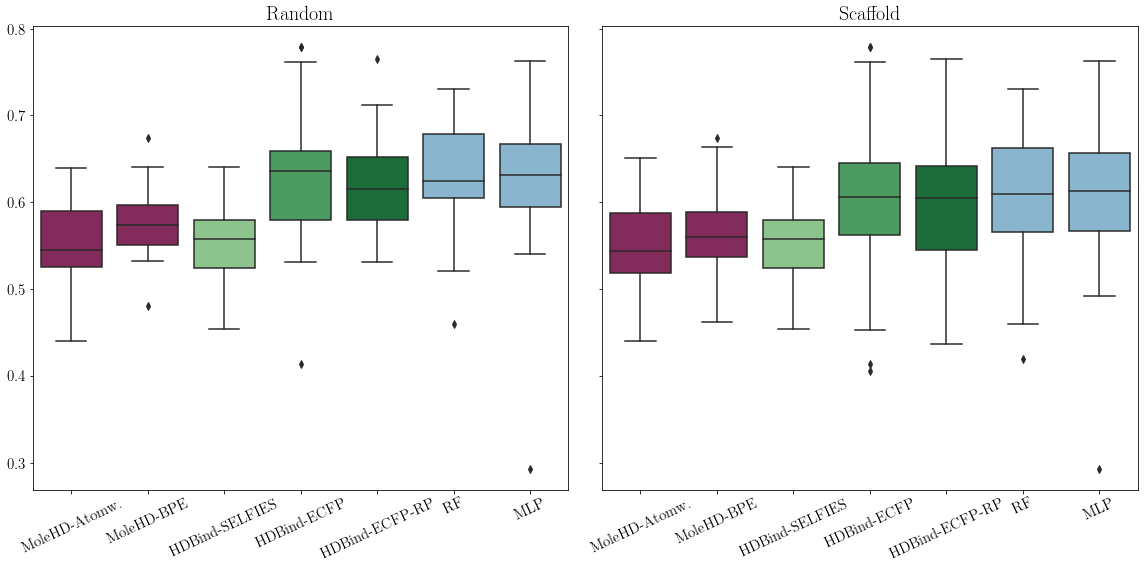

In [41]:
sider_main()

In [38]:
def clintox_main():    
    
    clintox_f, clintox_ax = plt.subplots(1,2, figsize=(20,6))

    
    
    data_p = Path("/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/")
    
    for split_type, ax in [("random", clintox_ax[0]), ("scaffold", clintox_ax[1])]:
        model_dict = {"model": [], "task": [], "roc-auc": []}
        ax.set_title(split_type.capitalize())

        for model, color in color_dict.items():

            data_path_list = list(data_p.glob(f"clintox.task_0.{split_type}.{model}*.pkl"))        

            for path in data_path_list:
                with open(path, "rb") as handle:

                    print(path)

                    data = pickle.load(handle)

                    name = str(path.name).split('.')[-2]


                    task = int(str(path.name).split('.')[1].split('_')[-1])


                    y_pred = data[0]['y_pred']
                    y_true = data[0]['y_true']
                    y_score = data[0]['eta']

                    score = None

                    if y_score.squeeze().ndim < 2:
                        score = y_score
                    else:
                        score = y_score[:, 1]
                    fpr, tpr, thresholds = roc_curve(y_score=score, y_true=y_true)
                    roc_auc = auc(fpr, tpr)

                    model_dict["model"].append(model)
                    model_dict["task"].append(task)
                    model_dict["roc-auc"].append(roc_auc)


        df = pd.DataFrame(model_dict)
        df["model_name"] = df["model"].apply(lambda x: model_name_dict[x])
        df["color"] = df["model"].apply(lambda x: color_dict[x])

        bars = ax.bar(data=df, x="model", height="roc-auc", color=[color_dict[x] for x in df['model'].values],
                     hatch="/")
        ax.tick_params(axis="x", labelrotation=25)
        ax.set_xticklabels([model_name_dict[x] for x in df['model'].values])
#         labels = [x.get_text() for x in ax.get_xticklabels()]
#         print(labels)
#         ax.set_xticklabels(labels)
    
#     clintox_ax[0].tick_params(axis="x", labelrotation=25)
#     labels = [x for x in clintox_ax[0].get_xticklabels()]
#     clintox_ax[0].set_xticklabels(labels)
#     clintox_ax[0].set_ylabel("")
#     clintox_ax[0].set_xlabel("")
    
#     clintox_ax[1].tick_params(axis="x", labelrotation=25)
#     labels = [x for x in clintox_ax[1].get_xticklabels()]
#     clintox_ax[1].set_xticklabels(labels)
#     clintox_ax[1].set_ylabel("")
#     clintox_ax[1].set_xlabel("")
    plt.tight_layout()
    clintox_f.savefig(f"clintox_roc.png", dpi=600, bbox_inches="tight")


/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.random.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.random.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.random.selfies.None.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.random.ecfp.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.random.rp.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.random.rf.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.random.mlp.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.scaffold.smiles-pe.atomwise.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.scaffold.smiles-pe.bpe.0.pkl
/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/results/clintox.task_0.scaffold.

/tmp/ipykernel_3547246/690637649.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([model_name_dict[x] for x in df['model'].values])
/tmp/ipykernel_3547246/690637649.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([model_name_dict[x] for x in df['model'].values])


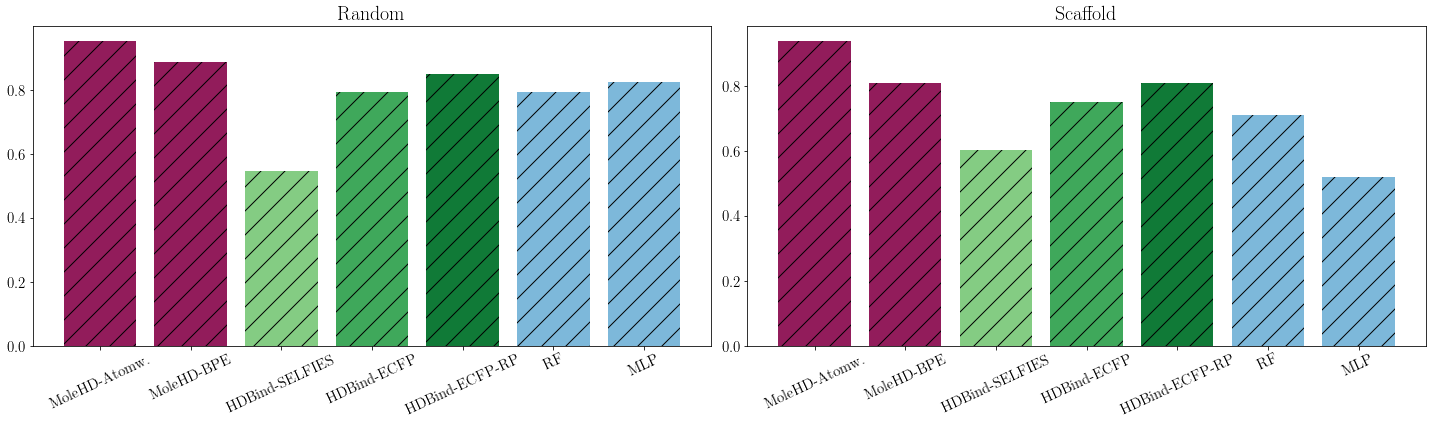

In [39]:
clintox_main()

I wonder if there is a bias in the smiles string itself that separates the positive from negative classes almost linearly? Especially since the raw smiles uni-gram model is the best here?